
# Analyzing Shop Satisfaction Data

This notebook walks through an analysis of shop satisfaction survey data. The data includes various demographic variables (like age, gender, and education), as well as satisfaction ratings on product range, price level, and more. We'll perform data cleaning, explore descriptive statistics, visualize the data, and examine the relationships between variables using cross-tabulation and hypothesis testing.

## Goals of the analysis:
1. Understand the demographics of the respondents.
2. Visualize satisfaction levels for various demographic groups.
3. Test whether there are significant relationships between certain variables (e.g., gender and education).

Let's begin by importing the necessary libraries and loading the dataset.

In [7]:
%pip install numpy
%pip install pandas
%pip install matplotlib
%pip install seaborn
%pip install openpyxl command

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached setuptools-75.2.0-py3-none-any.whl.metadata (6.9 kB)
Using cached setuptools-75.2.0-py3-none-any.whl (1.2 MB)
  Created wheel for command: filename=Command-0.1.0-py3-none-any.whl size=6412 sha256=39df338905b492362a84fd6e9b54d1125cd1ec2a8682a4d8db3e6826aae1f4d3
  Stored in directory: /Users/Andy_1/Library/Caches/pip/wheels/59/a5/fd/b9a2cf261e1c44a74c111f909d0c0216aef35a5d6ee487046a
Successfully built command
Note: you may need to restart the kernel to use updated packages.


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



## Initial Exploration

In this section, we'll start by importing the necessary libraries and loading the data. We'll take an initial look at the dataset to understand its structure and contents.



Here we use the `head()` function to display the first five rows of the dataset, which helps us quickly understand the variables available and how the data is structured.


In [9]:
# Open the data
df = pd.read_excel('ShopSatisfactionSurveyData.xlsx')
df.head()  # Display the first 5 rows of the data              

,H,1,2,3,4,5,6,7,8,9
0,1,1,34,4,1,4,2960.0,4.0,3,2
1,2,1,67,1,1,1,980.0,1.0,5,2
2,3,2,46,3,3,5,3500.0,4.0,2,4
3,4,1,22,2,2,3,860.0,1.0,5,3
4,5,2,30,5,2,4,3380.0,4.0,2,3



## Data Cleaning

Before diving into the analysis, we need to clean the data. In this step, we'll:
1. Rename columns based on the information provided in the dataset.
2. Drop unnecessary columns.
3. Check for missing values.

Cleaning the dataset ensures that it's in a format suitable for analysis.


In [10]:
df.isnull().sum()

H    0
1    0
2    0
3    0
4    0
5    0
6    2
7    1
8    0
9    0
dtype: int64

In [11]:
# Rename columns based on the explanations found in the Excel file
df.columns = ['H', 'gender', 'age', 'family_size', 'house', 'education', 'net_income', 'purchases', 'sat_product_range', 'sat_price_level']

In [6]:
df.head()

,H,gender,age,family_size,house,education,net_income,purchases,sat_product_range,sat_price_level
0,1,1,34,4,1,4,2960.0,4.0,3,2
1,2,1,67,1,1,1,980.0,1.0,5,2
2,3,2,46,3,3,5,3500.0,4.0,2,4
3,4,1,22,2,2,3,860.0,1.0,5,3
4,5,2,30,5,2,4,3380.0,4.0,2,3


In [9]:
# Drop unnecessary columns (like 'H')
df = df.drop(['H'], axis=1) # axis=1 means column , row is axis=0

In [10]:
df.head()

,gender,age,family_size,house,education,net_income,purchases,sat_product_range,sat_price_level
0,1,34,4,1,4,2960.0,4.0,3,2
1,1,67,1,1,1,980.0,1.0,5,2
2,2,46,3,3,5,3500.0,4.0,2,4
3,1,22,2,2,3,860.0,1.0,5,3
4,2,30,5,2,4,3380.0,4.0,2,3



## Descriptive Statistics and Summary

Next, we'll summarize the dataset using basic descriptive statistics. This gives us insights into the distribution, central tendencies, and variability of the variables.


In [11]:
# Get a summary of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             102 non-null    int64  
 1   age                102 non-null    int64  
 2   family_size        102 non-null    int64  
 3   house              102 non-null    int64  
 4   education          102 non-null    int64  
 5   net_income         100 non-null    float64
 6   purchases          101 non-null    float64
 7   sat_product_range  102 non-null    int64  
 8   sat_price_level    102 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 7.3 KB


In [12]:

# Display basic statistics for numerical columns
df.describe()

,gender,age,family_size,house,education,net_income,purchases,sat_product_range,sat_price_level
count,102.000000,102.000000,102.000000,102.000000,102.000000,100.000000,101.000000,102.000000,102.000000
mean,1.313725,41.176471,2.705882,1.745098,3.205882,2365.700000,2.584158,3.500000,2.754902
std,0.466298,12.779479,1.583255,0.684861,1.402531,960.653455,1.151237,1.149688,0.969192
min,1.000000,19.000000,1.000000,1.000000,1.000000,770.000000,1.000000,1.000000,1.000000
25%,1.000000,31.000000,1.000000,1.000000,2.000000,1667.500000,2.000000,3.000000,2.000000
50%,1.000000,39.500000,2.000000,2.000000,4.000000,2205.000000,2.000000,3.000000,3.000000
75%,2.000000,50.000000,4.000000,2.000000,4.000000,2990.000000,3.000000,5.000000,3.000000
max,2.000000,72.000000,7.000000,3.000000,5.000000,4850.000000,5.000000,5.000000,5.000000


In [13]:
# Finding the 3 oldest respondents based on age
df.nlargest(n=3, columns='age')

,gender,age,family_size,house,education,net_income,purchases,sat_product_range,sat_price_level
7,1,72,2,1,2,2220.0,2.0,5,3
91,1,69,1,2,1,1100.0,1.0,5,2
37,1,68,1,1,2,1120.0,1.0,5,3


In [14]:
# Finding the 3 youngest respondents based on age
df.nsmallest(n=3, columns='age')

,gender,age,family_size,house,education,net_income,purchases,sat_product_range,sat_price_level
36,2,19,5,1,3,NaN,NaN,4,1
8,2,20,1,2,3,820.0,1.0,5,1
53,1,20,4,1,3,NaN,3.0,3,1



## Visualizations

In this section, we'll create some visualizations to better understand the distribution of the data. We'll start by visualizing the distribution of net income and then explore other variables.



The boxplot provides a visual summary of the distribution of net household income. It shows the median, quartiles, and potential outliers, helping us understand the spread and concentration of income levels in the data.


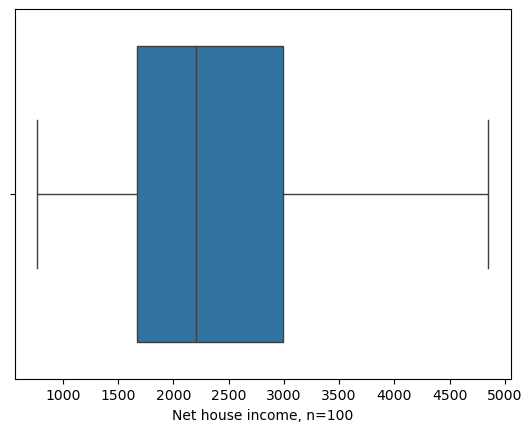

In [19]:
# Visualize the distribution of net income
ax3 = sns.boxplot(x=df['net_income'])   
ax3.set_xlabel('Net house income, n=' + str(df['net_income'].count()))  
plt.show()

### Investigating Qualitative Variables and Generating Frequency Tables

Investigate some of the qualitative (categorical) variables in the dataset. One such variable is the level of education, which we will use to generate a frequency table.

- We use the `pd.crosstab()` function to create a frequency table for the `education` column, which shows how many respondents fall into each education category.
- The education categories are manually labeled for clarity using common education levels.
- We remove the name for the columns to make the table cleaner.

In [15]:
# Investigate a few qualitative variables and generate frequency table(s) for their values
df1=pd.crosstab(df['education'], 'Count')

In [16]:
df1

col_0,Count
education,
1,16
2,22
3,10
4,33
5,21


In [17]:
# Labeling the index with meaningful education categories
df1.index=['Primary school','Vocational school or similar','Secondary school graduate','Applied science university','Other university']
df1

col_0,Count
Primary school,16
Vocational school or similar,22
Secondary school graduate,10
Applied science university,33
Other university,21


In [20]:
# Remove the name of the columns
df1.columns.name=''

In [21]:
df1

,Count
Primary school,16
Vocational school or similar,22
Secondary school graduate,10
Applied science university,33
Other university,21


### Visualizing the Education Distribution

Once we've generated the frequency table for the education levels, we can visualize the distribution using a horizontal bar chart. Bar charts are useful for comparing the sizes of different categories visually.

- We use the `plot.barh()` method to create a horizontal bar chart, which is a great way to display categorical data.
- Each bar represents an education level, and the length of the bar corresponds to the count of respondents in that category.

This visualization will make it easier to compare the distribution of education levels across the dataset.


<Axes: >

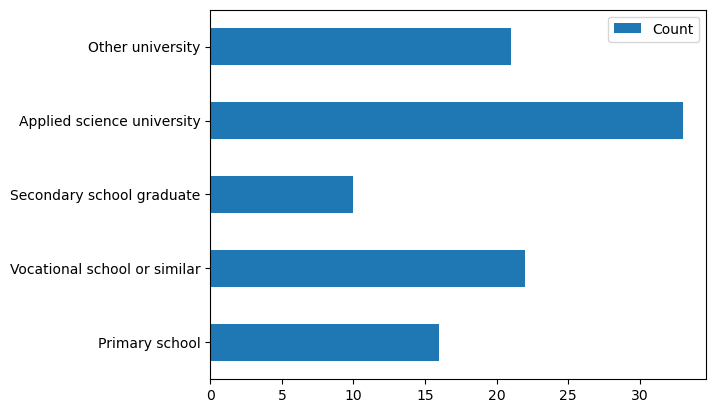

In [22]:
df1.plot.barh()

### Enhancing the Education Distribution Visualization

Enhance the previous bar chart by adding a title and axis labels for better readability. This helps provide context to the visualization, making it easier to interpret the data.

- Remove the legend from the chart for simplicity since it's not necessary in this case.
- Add a title, "Education distribution", to clearly indicate what the chart represents.
- The x-axis is labeled as "Count" to show the number of respondents in each education category.


Text(0.5, 0, 'Count')

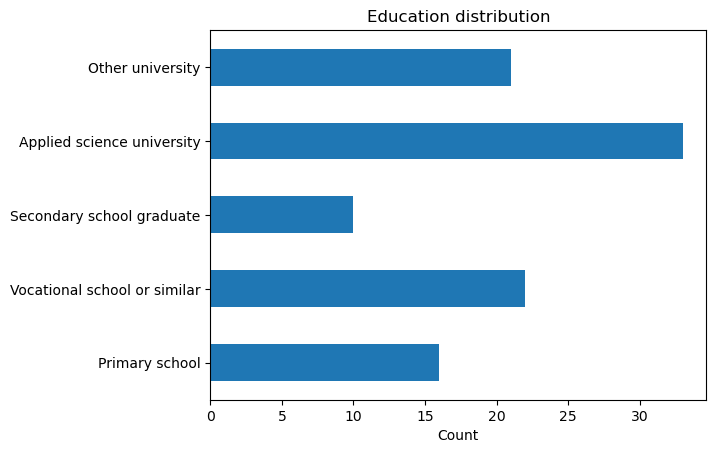

In [23]:
df1.plot.barh(legend = False)

plt.title('Education distribution')
plt.xlabel('Count')

### Adding the Total Count to the Education Distribution Chart

Calculate the total number of respondents and include it in the x-axis label of our bar chart. This provides additional context, making it clear that the chart represents a total of 102 respondents.

- First, calculate the sum of the counts in the `df1` frequency table using the `sum()` function.
- Then, plot the horizontal bar chart without a legend, similar to the previous step.
- Modify the x-axis label to include the total number of respondents (102 in this case).


In [24]:
sum(df1['Count'])

102

Text(0.5, 0, 'Count, N=102')

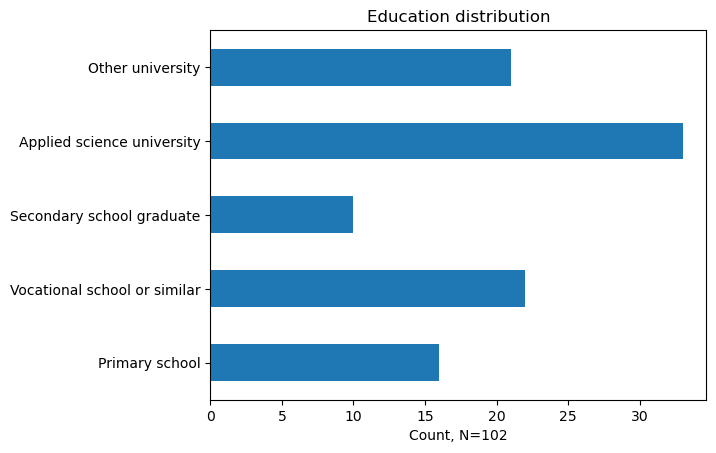

In [25]:
df1.plot.barh(legend = False)

plt.title('Education distribution')
plt.xlabel('Count, N=102')

### Calculating Percentages for Education Distribution

The frequency table of education is extended by calculating the percentage of respondents in each category. This allows for a better understanding of the relative sizes of each group compared to the total number of respondents.

- The `pd.crosstab()` function is used to create a new frequency table (`df2`) for the `education` column, similar to the earlier table.
- A new column, `%`, is added, which calculates the percentage of respondents in each education category.
- The education categories are manually labeled for clarity, and the name of the columns is removed for a cleaner presentation.


In [26]:
df2 = pd.crosstab(df['education'], 'Count')
df2['%'] = df2['Count'] / df2['Count'].sum() * 100
df2.index = ['Primary school', 'Vocational school or similar', 'Secondary school graduate', 'Applied science university', 'Other university']
df2.columns.name = ''
df2


,Count,%
Primary school,16,15.686275
Vocational school or similar,22,21.568627
Secondary school graduate,10,9.803922
Applied science university,33,32.352941
Other university,21,20.588235


### Visualizing the Education Distribution with Percentages

Visualizes the education distribution using percentages instead of raw counts. A horizontal bar chart is created to show the proportion of respondents in each education category.

- The `plot.barh()` method is used to create the bar chart.
- A title is added to the chart, and the x-axis label is updated to show the total number of respondents.
- Gridlines are displayed along the x-axis for clarity, and the y-axis tick marks are hidden to keep the chart clean.


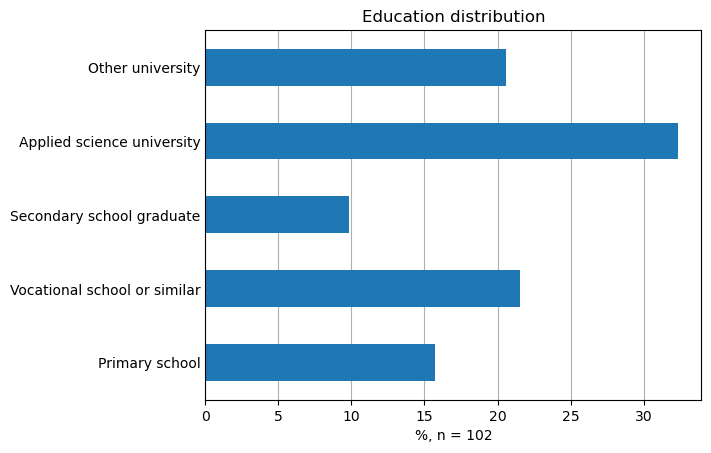

In [27]:
df2['%'].plot.barh(zorder = 2)      # zorder parameter is used to put the bars on top of the grid

plt.title('Education distribution')

plt.xlabel('%, n = ' + str(df2['Count'].sum())) 

plt.grid(axis = 'x')
plt.tick_params(axis = 'y', length = 0)

### Categorizing Net Income into Bins

The `net_income` column is categorized into different income classes based on specified ranges (bins). This allows for grouping the respondents' net income into meaningful categories for further analysis.

- The minimum and maximum values of `net_income` are identified to understand the income range in the dataset.
- The income is then classified into bins using the `pd.cut()` function. The specified bins are: 500-1000, 1000-2000, 2000-3000, 3000-4000, and 4000-7000.
- A new column `income_class` is created to store the categorized income values.

In [28]:
min(df['net_income'])

770.0

In [29]:
max(df['net_income'])

4850.0

In [30]:
bins = [500, 1000, 2000, 3000, 4000, 7000]

In [31]:
df['income_class'] = pd.cut(df['net_income'], bins = bins)

In [32]:
df

,gender,age,family_size,house,education,net_income,purchases,sat_product_range,sat_price_level,income_class
0,1,34,4,1,4,2960.0,4.0,3,2,"(2000, 3000]"
1,1,67,1,1,1,980.0,1.0,5,2,"(500, 1000]"
2,2,46,3,3,5,3500.0,4.0,2,4,"(3000, 4000]"
3,1,22,2,2,3,860.0,1.0,5,3,"(500, 1000]"
4,2,30,5,2,4,3380.0,4.0,2,3,"(3000, 4000]"
...,...,...,...,...,...,...,...,...,...,...
97,1,38,1,2,4,1380.0,1.0,4,3,"(1000, 2000]"
98,1,56,2,2,1,1700.0,2.0,3,3,"(1000, 2000]"
99,1,42,5,1,5,4430.0,5.0,2,4,"(4000, 7000]"
100,2,36,1,2,1,1100.0,1.0,5,1,"(1000, 2000]"


### Creating a Frequency Table for Income Classes

A frequency table is created for the income classes that were categorized in the previous step. This table shows both the count and percentage of respondents in each income class.

- The `pd.crosstab()` function is used to create a frequency table (`df3`) for the `income_class` column, showing the count of respondents in each income category.
- The column name is removed for a cleaner look.
- The total count of respondents is calculated, and a percentage column is added to the frequency table to display the proportion of respondents in each income category.


In [33]:
df3 = pd.crosstab(df['income_class'], 'Count')

df3.columns.name = ''

# Percentages
n = df3['Count'].sum()
df3['%'] = df3 / n * 100

In [34]:
df3

,Count,%
income_class,,
"(500, 1000]",6,6.0
"(1000, 2000]",34,34.0
"(2000, 3000]",36,36.0
"(3000, 4000]",17,17.0
"(4000, 7000]",7,7.0


In [35]:
type(df3.index.values[0])

pandas._libs.interval.Interval

### Adding a Total Row to the Income Class Table

The index of the income class table is converted to strings so that a "Total" row can be added to the table. The total row provides a summary of the counts and percentages across all income classes.

- The index of the `df3` table is converted to strings using `astype(str)` to ensure consistency when adding the "Total" row.
- A new row labeled "Total" is added, which contains the sum of the counts and percentages across all income classes.


In [36]:
df3.index = df3.index.astype(str)
df3.loc['Total'] = df3.sum()
df3

,Count,%
income_class,,
"(500, 1000]",6.0,6.0
"(1000, 2000]",34.0,34.0
"(2000, 3000]",36.0,36.0
"(3000, 4000]",17.0,17.0
"(4000, 7000]",7.0,7.0
Total,100.0,100.0


In [37]:
# Checking the Data Type of the Income Class Index
type(df3.index.values[0])

str

In [38]:
# Finalizing the layout
#The `style.format()` function is used to format the `Count` column as an integer without decimal points.
#The `%` column is formatted to display one decimal place followed by a percentage symbol.

df3.style.format({'Count': '{:.0f}', '%': '{:.1f} %'})

,Count,%
income_class,,
"(500, 1000]",6,6.0 %
"(1000, 2000]",34,34.0 %
"(2000, 3000]",36,36.0 %
"(3000, 4000]",17,17.0 %
"(4000, 7000]",7,7.0 %
Total,100,100.0 %


### Creating a Histogram for Net Income Distribution (Counts)

In this step, a histogram is generated to visualize the distribution of `net_income` using the predefined income bins. The histogram provides a visual representation of how many respondents fall into each income range.

- The `hist()` function is used to create a histogram for the `net_income` column, with the previously defined bins.
- The x-axis is labeled "Net income" to represent the different income ranges.
- The y-axis is labeled "Count", and the total number of respondents is included in the label.


Text(0, 0.5, 'Count, n=100')

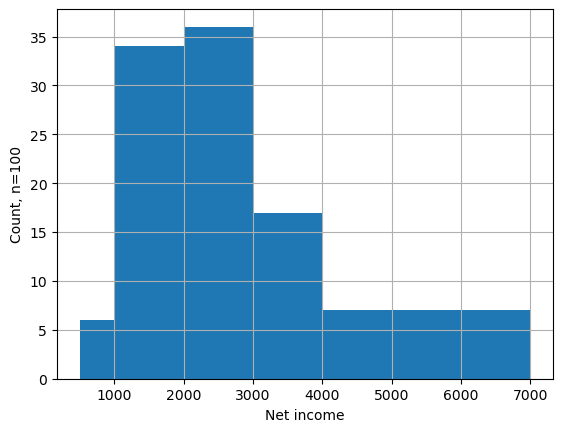

In [39]:
df['net_income'].hist(bins = bins)

plt.xlabel('Net income')
plt.ylabel('Count, n=' + str(n))

- a histogram is generated to visualize the distribution of `net_income` using percentages instead of counts. This helps in understanding the proportion of respondents in each income range relative to the total population.

Text(0, 0.5, '%, n=100')

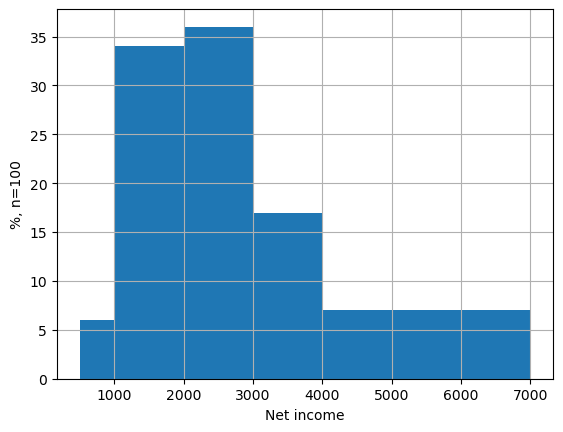

In [40]:
df['net_income'].hist(bins = bins, weights = np.ones(n) / n * 100)

plt.xlabel('Net income')
plt.ylabel('%, n=' + str(n))

---

### Creating a Cross-Tabulation of Education and Gender (Percentages)

In this step, a cross-tabulation of `education` and `gender` is created, showing the percentage of women and men in each education category. This helps in comparing the distribution of education levels across genders.

- The `pd.crosstab()` function is used to create a cross-tabulation of the `education` and `gender` columns.
- The `normalize='columns'` argument is used to calculate percentages for each gender separately, so the percentages sum to 100% within each gender column.
- The education categories are labeled for clarity, and the columns are renamed as "woman" and "man."


In [2]:
df4 = pd.crosstab(df['education'], df['gender'], normalize = 'columns') * 100
df4.index = ['Primary school', 'Vocational school or similar', 'Secondary school graduate', 'Applied science university', 'Other university']
df4.columns = ['woman', 'man']

NameError: name 'pd' is not defined

In [42]:
df4

,woman,man
Primary school,14.285714,18.750
Vocational school or similar,20.000000,25.000
Secondary school graduate,10.000000,9.375
Applied science university,35.714286,25.000
Other university,20.000000,21.875


- A horizontal bar chart is created to visualize the percentage distribution of education levels across genders. This provides a clear visual comparison between women and men in different education categories.

In [1]:
df4.plot.barh(legend = 'noreverse')  # Reverse the order of the legend to match the order of the bars in the plot 

plt.xlabel('Percentages for gender')

plt.grid(axis = 'y')

NameError: name 'df4' is not defined

### Creating a Cross-Tabulation of Education and Gender (Raw Counts)

In this step, a cross-tabulation of `education` and `gender` is created, showing the raw count of women and men in each education category. This helps in understanding the actual number of respondents in each group.

- The `pd.crosstab()` function is used to generate a cross-tabulation between the `education` and `gender` columns, where the values represent raw counts rather than percentages.
- The education categories are manually labeled for clarity, and the columns are renamed as "woman" and "man."


In [44]:
# Create a cross-tabulation between education and gender, showing raw counts
df5 = pd.crosstab(df['education'], df['gender'])

# Label the index with education categories
df5.index = ['Primary school', 'Vocational school or similar', 'Secondary school graduate', 'Applied science university', 'Other university']

# Rename the columns to 'woman' and 'man'
df5.columns = ['woman', 'man']

df5


,woman,man
Primary school,10,6
Vocational school or similar,14,8
Secondary school graduate,7,3
Applied science university,25,8
Other university,14,7


### Performing a Chi-Square Test for Education and Gender Dependency

A Chi-Square test is performed to assess whether there is a statistically significant relationship between education levels and gender. This helps determine if the observed differences in education distribution between women and men are due to chance or reflect a real dependency.

- The `chi2_contingency()` function from the `scipy.stats` module is used to perform the test.
- The test is conducted on the raw counts from the cross-tabulation (`df5`), as the Chi-Square test requires count data.
- The output includes the Chi-Square statistic, the p-value, degrees of freedom, and the expected frequencies.


In [46]:
from scipy.stats import chi2_contingency


chi2_contingency(df5)

Chi2ContingencyResult(statistic=1.3590340909090908, pvalue=0.8512829058809862, dof=4, expected_freq=array([[10.98039216,  5.01960784],
       [15.09803922,  6.90196078],
       [ 6.8627451 ,  3.1372549 ],
       [22.64705882, 10.35294118],
       [14.41176471,  6.58823529]]))

## Interpretation

- Since the p-value (0.851) is greater than 0.05, the result suggests that there is no significant dependency between education level and gender in this dataset.

- The observed distribution of education levels across genders is likely due to random variation and not due to a meaningful relationship.